# Oasis Infobyte
## Name : Ajith Singh Ramavath
## Task : Car Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\Virtual internships\\Oasis Infobyte\\T3\\archive\\CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
df.duplicated().value_counts()

False    205
dtype: int64

In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<AxesSubplot:>

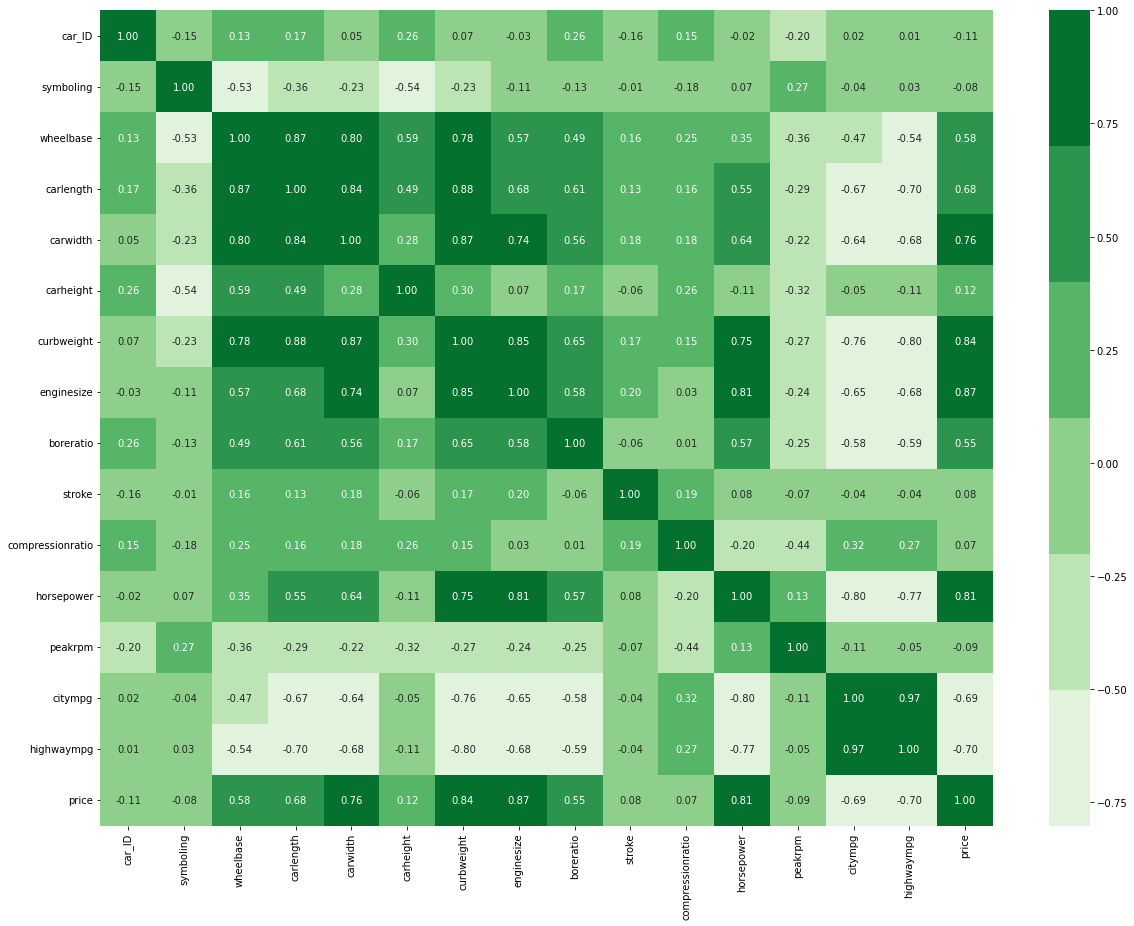

In [8]:
colormap = sns.color_palette("Greens")
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap=colormap, ax=ax)


In [9]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df[cat_col]=df[cat_col].astype(str)
df_cat = df[cat_col]
df_num = df[num_col] 

In [10]:
carname = df["CarName"].nunique()

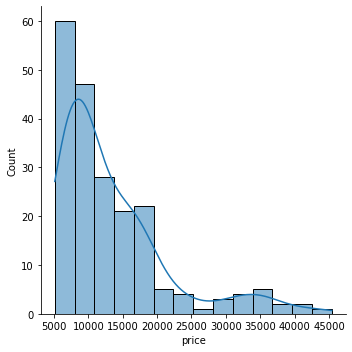

In [11]:
# Distribution of price 
sns.displot(df["price"],kind="hist",kde=True)

The price value are positively skewed, so the mean will be greater than median.

In [12]:
print("Mean of Price :" , df["price"].mean())
print("Median of Price :" ,df["price"].median())

Mean of Price : 13276.710570731706
Median of Price : 10295.0


<AxesSubplot:xlabel='price', ylabel='highwaympg'>

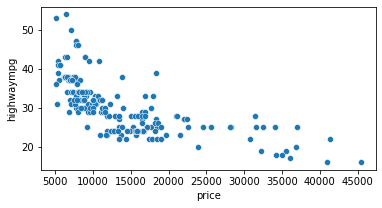

In [13]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=df, x="price",y=df_num.columns[-2])

* carwidth, carlength, curbweight, enginesize and horsepowerseems have a poitive correlation with price.
* carheight don't have any correlation with price.

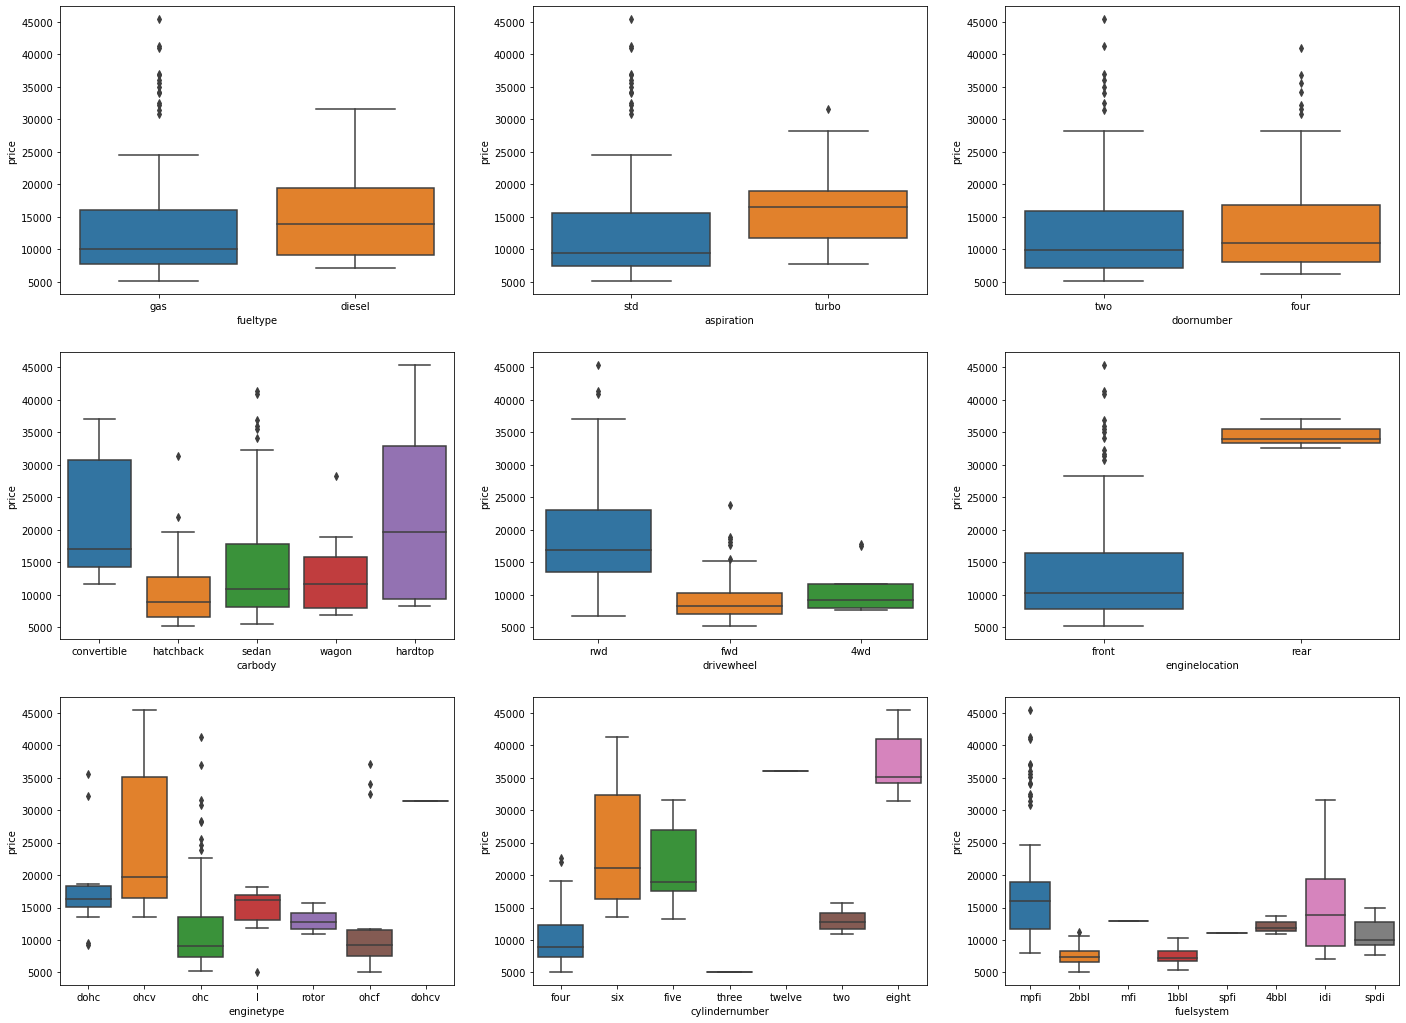

In [14]:
fig, axes = plt.subplots(3,3 , figsize=(24,18))
axes = axes.flatten()
features = list(df_cat.columns)
features.remove("CarName")
for i in range(len(features)):
    sns.boxplot(x = features[i], y = 'price', data = df,ax=axes[i])
plt.show()

In [15]:
# Remove the unwanted columns to avoid overfitting the model
df = df[['price','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel','wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 'citympg','highwaympg', 'carlength','carwidth']]

In [16]:
# Let's create a new column Pricecategory with three classes
df.loc[ df['price'] <= 20000, 'priceCatagory'] = 0
df.loc[(df['price'] > 20000) & (df['price'] <= 40000), 'priceCatagory'] = 1
df.loc[ df['price'] > 40000, 'priceCatagory'] = 2
df["priceCatagory"]=df["priceCatagory"].astype(int)

In [17]:
# Data Tranformation
from sklearn.preprocessing import LabelEncoder
cat=["enginetype","fueltype","aspiration","carbody","cylindernumber","drivewheel"]
for i in cat:
    LE = LabelEncoder()
    df[i]= LE.fit_transform(df[i])
df.head()

,price,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,priceCatagory
0,13495.0,0,1,0,0,2,2,88.6,2548,130,3.47,111,21,27,168.8,64.1,0
1,16500.0,0,1,0,0,2,2,88.6,2548,130,3.47,111,21,27,168.8,64.1,0
2,16500.0,5,1,0,2,3,2,94.5,2823,152,2.68,154,19,26,171.2,65.5,0
3,13950.0,3,1,0,3,2,1,99.8,2337,109,3.19,102,24,30,176.6,66.2,0
4,17450.0,3,1,0,3,1,0,99.4,2824,136,3.19,115,18,22,176.6,66.4,0


In [18]:
x= df.drop(["price"],axis=1)
y = df["price"]

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(x_train,y_train)
y_pred_train = KNC.predict(x_train)
y_pred_test = KNC.predict(x_test)
y_pred_train

In [ ]:
# Metrics
from sklearn.metrics import accuracy_score
ac1_knc = accuracy_score(y_train, y_pred_train)
ac2_knc = accuracy_score(y_test, y_pred_test)
print("Train accuracy:", ac1_knc.round(2)*100)
print("Test accuracy:", ac2_knc.round(2)*100)